# ELT 575 - Aprendizado Profundo
## Atividade 4
### Aluno: José Eduardo de Souza Pimentel

# Parte 1

**1 - Com base no que vimos no curso, aponte em quais casos as redes neurais recorrentes (RNN) e redes neurais convolucionais (CNN) devem ser aplicadas. Quais características dessas redes favorecem cada tipo de aplicação?**

As Redes Neurais Recorrentes ajustam seus pesos não somente com as informações de saída da época de treinamento atual, como também das anteriores (t-1, t-2, ...), que se combinam para a obtenção de um ajuste mais preciso. As RNN têm como característica a recorrência, que é a modificação do neurônio, que se desdobra em vários, para que receba as informações de instantes de tempo anteriores ou das posições de uma sequência. Por isso, elas são bastante empregadas em análises temporais, de textos e de arquivos de áudio, porque, nesses casos, há uma dependência, no tempo ou na sequência, entre os elementos da informação.

As Redes Neurais Convolucionais são largamente empregadas em classificação de imagens. Baseiam-se no funcionamento do córtex visual: as unidades que compõe a CNN são, a exemplo do modelo biológico, especializadas, ou seja, destinadas a analisar determinadas características de baixo nível da imagem. São, ademais, conectadas a um número limitado de neurônios, o que garante a esparsividade. Além disso, compartilham parâmetros, ou seja, os filtros (kernels) percorrem toda a imagem de entrada, colhendo os padrões, indiferente a movimentos de translações (mudança de posição) que a entrada possa sofrer. A esparsidade e o compartilhamento de parâmetros conferem eficiência às CNN, fazendo com que demandem menos poder computacional para a realização das tarefas.


**2 - No que consiste a técnica Transfer Learning? Por que essa técnica é muito utilizada em problemas relacionados com imagens?**

O transfer learning (ou aprendizado por transferência) é uma técnica que permite construir modelos eficientes mesmo quando há limitação de amostras nos dados de treinamento.

O exemplo clássico é o do classificador de imagens. Nele, reutilizam-se camadas pré-treinadas de outro modelo, como o Xception, que foi treinado com imagens no ImageNet, excluímos camadas médias (de pooling global e de saída densa) e adicionamos as nossas próprias camadas de pooling global e densa, esta conforme a saída que desejamos. É útil congelar os pesos das camadas pré-treinadas. Finalmente, o modelo é compilado e avaliado.

Como se intui, a técnica permite aproveitar o aprendizado obtido pelo modelo pré-treinado quando exposto a grandes bases de dados em cenários cuja tarefa possua alguma semelhança, porém com menores recursos de poder computacional, dados, tempo ou orçamento. 









**3 - O que são os autoencoders? Explique com suas palavras como esse tipo de modelo funciona.**

Os autoencoders são arquiteturas de aprendizado profundo que combinam duas redes feedfoward, de forma simétrica. A primeira extrai características dos dados de entrada e produz na saída a representação desses dados, em menor dimensão. A segunda tem por finalidade reconstruir o dado de entrada (original) a partir da representação construída na rede precedente. Como os dados original e de saída são comparados, o modelo aprende a extrair as características mais relevantes da informação. Os autoencoders podem ser úteis para a supressão de ruídos, por exemplo.




**4 - Procure algum exemplo de aplicação recente de técnicas de Aprendizado Profundo para a solução de algum problema que ache relevante (classificação/identificação de doenças em plantas, diagnóstico médico, anaĺise de textos em redes sociais, previsão de ações da bolsa de valores, etc.). Explique o exemplo encontrado, destacando a importância do problema, a estratégia usada para resolvê-lo e os resultados obtidos.**

A pesquisa revelou que há várias iniciativas voltadas ao diagnóstico médico com Aprendizado Profundo e Transfer Learning. Relacionada a isso, encontra-se a Internet das Coisas Médicas (ou IoMT), que se constitui no ecossistema de dispositivos portáteis, sensores, vestíveis etc. destinados a coletar dados de pacientes e submetê-los às soluções automatizadas de diagnósticos. 

Surpreendeu-me, entretanto, os esforços voltados para o dignóstico do Covid-19 a partir de radiografias de tórax e tomografias computadorizadas de pulmões, com ML e Transfer Leaning. O uso das técnicas se justificou, principalmente, pela premência dos resultados (que contribuiria para deter a disseminação da doença) e escassez de imagens para o treinamento, lembrando-se de que a patologia era, ao tempo dos primeiros ensaios, desconhecida. 

É possível inferir, portanto, que a escassez de recursos - de tempo, imagens, orçamento, etc - foi fator de fundamental importância para a utilização do Transfer Learning para a definição dos modelos de diganóstico de Covid-19, uma vez que a técnica aproveita a capacidade do modelo em que se baseia de identificar as informações de baixo nível das imagens. Ao modelo modificado se acrescentam camadas que contribuirão para torná-lo mais adequado à tarefa específica. São feitos novos treinos (mantendo-se os pesos já aprendidos das primeiras camadas), tornando-o apto a estabelecer o diagnóstico da doença pesquisada, com boa capacidade de abstração, diante das novas imagens. Assim, o modelo converge de forma mais rápida e reaproveita recursos valiosos, ainda que originalmente tenham sido estabelecidos ao ser exposto a imagens bastante diversas e de outros campos de interesse.



# Parte 2

Aplique a técnica de transfer learning para treinar um novo modelo para classificar o dataset CIFAR-10, usado na Atividade 2. Comente sobre os resultados obtidos neste experimento quando comparados com os resultados obtidos na realização da Atividade 2. Foi mais fácil e rápido treinar o modelo usando transfer learning?

DICA: O script pode uma modificação do que foi usado na Atividade 2, alterando apenas a parte de construção do modelo para usar um modelo pré-treinado (recomenda-se o VGG16) seguido de camadas totalmente conectadas, como no exemplo Transfer_learning_CNN.ipynb, disponibilizado na plataforma.

Exemplo Transfer_learning_CNN:
https://colab.research.google.com/drive/1cuETYxf8-rDQOj0bhHYFybOJVyW6-V_z?usp=sharing

Dados Usados no exemplo de Transfer Learning:
https://drive.google.com/drive/folders/1VYURCRwxEj5888IYHbO-OT0fzC0hI1jm?usp=sharing

# Transfer Learning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from google.colab import drive
drive.mount('/content/meu_drive')

Mounted at /content/meu_drive


# Importando dados

In [ ]:
# Carregando o dataset CIFAR10
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# fazendo um reshape no dataset para ter um único canal
trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))

# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Construção do Modelo

In [ ]:
# Carregamos o modelo VGG16 sem as últimas camadas totalmente conectadas (include_top=False)
pre_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Aqui fazemos com que as camadas do modelo pré-treinado não sejam alteradas durante o treino
for layer in pre_model.layers:
  layer.trainable = False

# Criamos então um modelo sequential onde temos o VGG16 seguido das novas camadas conectadas
model = Sequential()

model.add(pre_model)
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


# Compilação do modelo

In [ ]:
opt = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# Checando a estrutura do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

# Treinamento do modelo

In [ ]:
history = model.fit(trainX, trainY, 
          epochs=30,
          validation_data=(testX, testY),
          verbose=1)

Epoch 1/30
1563/1563 [==============================] - 516s 329ms/step - loss: 1.9115 - accuracy: 0.2980 - val_loss: 1.5419 - val_accuracy: 0.4592
Epoch 2/30
1563/1563 [==============================] - 571s 365ms/step - loss: 1.6652 - accuracy: 0.4065 - val_loss: 1.4383 - val_accuracy: 0.5057
Epoch 3/30
1563/1563 [==============================] - 583s 373ms/step - loss: 1.5965 - accuracy: 0.4405 - val_loss: 1.4101 - val_accuracy: 0.5133
Epoch 4/30
1563/1563 [==============================] - 578s 370ms/step - loss: 1.5675 - accuracy: 0.4548 - val_loss: 1.3960 - val_accuracy: 0.5300
Epoch 5/30
1563/1563 [==============================] - 511s 327ms/step - loss: 1.5415 - accuracy: 0.4689 - val_loss: 1.3515 - val_accuracy: 0.5488
Epoch 6/30
1563/1563 [==============================] - 510s 326ms/step - loss: 1.5239 - accuracy: 0.4784 - val_loss: 1.3343 - val_accuracy: 0.5488
Epoch 7/30
1563/1563 [==============================] - 562s 360ms/step - loss: 1.5092 - accuracy: 0.4830 - val_

# Acurácia do Modelo

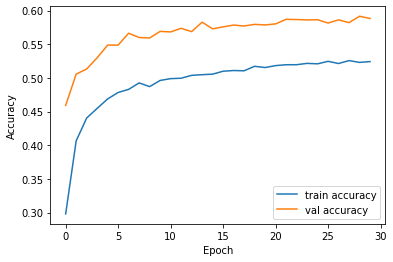

In [ ]:
# plota a acurácia de treinamento e validação em relação às épocas
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()